In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
avg_delay_df = pd.read_csv('C:/Users/MSI/avg_delay.csv')


In [8]:
avg_delay_df.index = pd.to_datetime(avg_delay_df['time'], format='%Y-%m-%d %H:%M:%S%z')


<Axes: xlabel='time'>

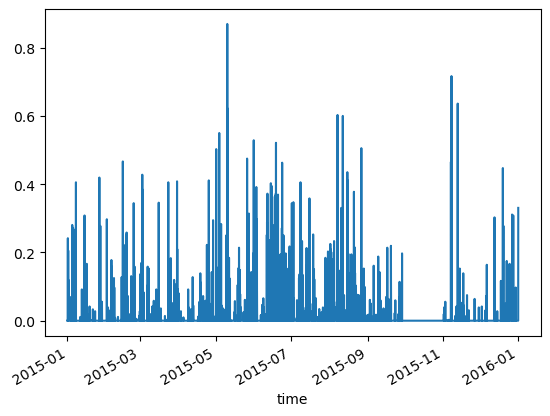

In [9]:
airport_name = "ACY"
used_df = avg_delay_df[airport_name]
used_df.plot()

In [10]:
def df_to_X_y(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [11]:
X1, y1 = df_to_X_y(used_df)
X1.shape, y1.shape

((8031, 7, 1), (8031,))

In [12]:
train_size = int(0.7 * len(used_df))  # 60% for training 4822
val_size = int(0.2 * len(used_df))    # 20% for validation 1607
test_size = len(used_df) - train_size - val_size
X_train1, y_train1 = X1[:train_size], y1[:train_size]
X_val1, y_val1 = X1[train_size:train_size+val_size], y1[train_size:train_size+val_size]
X_test1, y_test1 = X1[train_size+val_size:], y1[train_size+val_size:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((5626, 7, 1), (5626,), (1607, 7, 1), (1607,), (798, 7, 1), (798,))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [44]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100 , title='model2'):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})

  plt.figure(figsize=(6, 4))
  plt.plot(df['Predictions'][start:end], color='red', label='Predictions')
  plt.plot(df['Actuals'][start:end], color='grey', label='Actuals')
  
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.legend()
  plt.show()
  
  mse_value = mse(y, predictions)
  
  return df, mse_value

In [21]:
model1_Conv1D = Sequential()
model1_Conv1D.add(InputLayer((7, 1)))
model1_Conv1D.add(Conv1D(512,kernel_size=2))
model1_Conv1D.add(Flatten())
model1_Conv1D.add(Dense(128, 'relu'))
model1_Conv1D.add(Dense(128, 'relu'))
model1_Conv1D.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 512)            1536      
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 411521 (1.57 MB)
Trainable params: 411521 (1.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
cp1_conv= ModelCheckpoint('model/', save_best_only=True)
model1_Conv1D.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [24]:
model1_Conv1D.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1_conv])

Epoch 1/10
173/176 [============================>.] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0473INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 2s 9ms/step - loss: 0.0022 - root_mean_squared_error: 0.0470 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 2/10
167/176 [===========================>..] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 1s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0468 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 3/10
176/176 [==============================] - 1s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0467 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 4/10
176/176 [==============================] - 1s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0354
Epoch 5/10
176/176 [==============================] - 1s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0465 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0350
Epoch 6/10
176/176 [==============================] - 1s 5ms/step - loss: 0.0022 - root_mean_squared_error: 0.0464 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 7/10
176/176 [==============================] - 1s 5ms/step - loss: 0.0021 - root_mean_squared_error: 0.0463 - val_loss: 0.0013 - val_root_mean_s

51/51 [==============================] - 0s 2ms/step


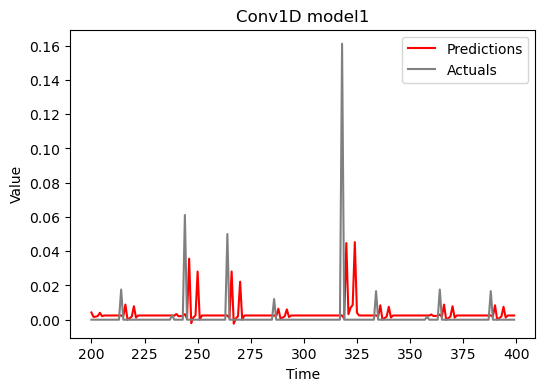

(      Predictions   Actuals
 0        0.052332  0.000000
 1       -0.002773  0.000000
 2        0.002275  0.000000
 3        0.003163  0.000000
 4        0.035228  0.035185
 ...           ...       ...
 1602     0.002450  0.000000
 1603     0.002450  0.000000
 1604     0.002450  0.000000
 1605     0.002450  0.000000
 1606     0.002450  0.000000
 
 [1607 rows x 2 columns],
 0.0012211955765062533)

In [51]:

#plt.plot(train_results['Train Predictions'][:500])
#plt.plot(train_results['Actuals'][:500])
plot_predictions1(model1_Conv1D, X_val1, y_val1,200,400,title="Conv1D model1")


In [28]:
model1_GRU = Sequential()
model1_GRU.add(InputLayer((7, 1)))
model1_GRU.add(GRU(512))

model1_GRU.add(Dense(128, 'relu'))
model1_GRU.add(Dense(128, 'relu'))
model1_GRU.add(Dense(1, 'linear'))

model1_GRU.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 512)               791040    
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 873345 (3.33 MB)
Trainable params: 873345 (3.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
cp1_gru= ModelCheckpoint('model/', save_best_only=True)
model1_GRU.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [30]:
model1_GRU.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1_gru])

Epoch 1/10
175/176 [============================>.] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 9s 44ms/step - loss: 0.0023 - root_mean_squared_error: 0.0476 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0351
Epoch 2/10
175/176 [============================>.] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0474INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 8s 44ms/step - loss: 0.0023 - root_mean_squared_error: 0.0475 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 3/10
176/176 [==============================] - 6s 32ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 4/10
176/176 [==============================] - 5s 31ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 5/10
175/176 [============================>.] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0475INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 7s 40ms/step - loss: 0.0023 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 6/10
176/176 [==============================] - 5s 30ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0352
Epoch 7/10
176/176 [==============================] - 5s 31ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 8/10
176/176 [==============================] - 5s 31ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0349
Epoch 9/10
176/176 [==============================] - 6s 31ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0347
Epoch 10/10
176/176 [==============================] - 6s 32ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0012 - val_root

51/51 [==============================] - 1s 11ms/step


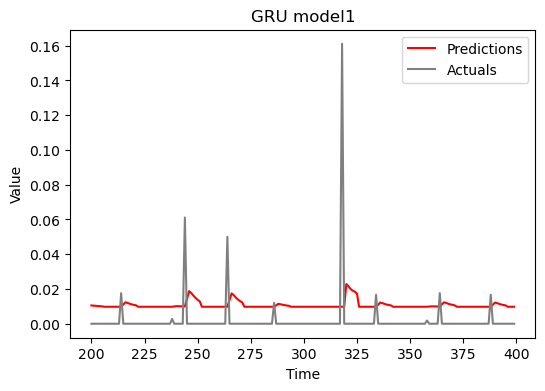

(      Predictions   Actuals
 0        0.020318  0.000000
 1        0.019385  0.000000
 2        0.017452  0.000000
 3        0.016041  0.000000
 4        0.014760  0.035185
 ...           ...       ...
 1602     0.009763  0.000000
 1603     0.009763  0.000000
 1604     0.009763  0.000000
 1605     0.009763  0.000000
 1606     0.009763  0.000000
 
 [1607 rows x 2 columns],
 0.0012454196487443163)

In [49]:
plot_predictions1(model1_GRU, X_val1, y_val1,200,400,title="GRU model1")

In [38]:
model1_LSTM = Sequential()
model1_LSTM.add(InputLayer((7, 1)))
model1_LSTM.add(LSTM(128))
model1_LSTM.add(Dense(128, 'relu'))
model1_LSTM.add(Dense(128, 'relu'))
model1_LSTM.add(Dense(1, 'linear'))

model1_LSTM.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 83201 (325.00 KB)
Trainable params: 83201 (325.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
cp1_LSTM= ModelCheckpoint('model/', save_best_only=True)
model1_LSTM.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [40]:
model1_LSTM.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1_LSTM])

Epoch 1/10
169/176 [===========================>..] - ETA: 0s - loss: 0.0023 - root_mean_squared_error: 0.0476INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 5s 19ms/step - loss: 0.0023 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 2/10
176/176 [==============================] - 1s 6ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0353
Epoch 3/10
176/176 [==============================] - 1s 8ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 4/10
171/176 [============================>.] - ETA: 0s - loss: 0.0022 - root_mean_squared_error: 0.0472INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 3s 18ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0345
Epoch 5/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0348
Epoch 6/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 7/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0022 - root_mean_squared_error: 0.0474 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0355
Epoch 8/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 9/10
176/176 [==============================] - 1s 7ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0012 - val_root_mean_

INFO:tensorflow:Assets written to: model\assets


176/176 [==============================] - 3s 18ms/step - loss: 0.0022 - root_mean_squared_error: 0.0473 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0345


51/51 [==============================] - 1s 10ms/step


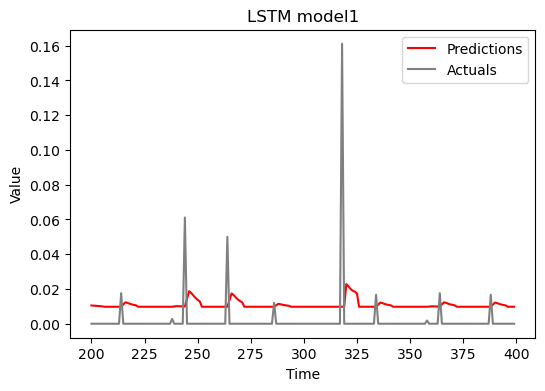

(      Predictions   Actuals
 0        0.020318  0.000000
 1        0.019385  0.000000
 2        0.017452  0.000000
 3        0.016041  0.000000
 4        0.014760  0.035185
 ...           ...       ...
 1602     0.009763  0.000000
 1603     0.009763  0.000000
 1604     0.009763  0.000000
 1605     0.009763  0.000000
 1606     0.009763  0.000000
 
 [1607 rows x 2 columns],
 0.0012454196487443163)

In [48]:
plot_predictions1(model1_GRU, X_val1, y_val1,200,400,title="LSTM model1")
